# Rmagic in IPython

_NOTE: When running in CoCalc, this notebook must be run using the Classical Jupyter notebook._

**This file is part of the [examples collection](https://github.com/sagemath/cloud-examples/) of [the Sagemath Cloud](https://cloud.sagemath.com).**

[Rmagic](http://nbviewer.ipython.org/urls/github.com/ipython/ipython/raw/master/examples/notebooks/R%2520Magics.ipynb)
is an extension for [IPython](http://ipython.org).
Check out the [full IPython notebook](http://nbviewer.ipython.org/urls/github.com/ipython/ipython/raw/master/examples/notebooks/R%2520Magics.ipynb) for additional details!
It is based on [RPy2](http://rpy.sourceforge.net/rpy2.html) and allows to seamlessly talk to an underlying R session via an IPython notebook.

To activate it, see the cell below. There are basically only a few core commands:

* `%R` runs a line of R code, return values can be assigned via `var = %R ...`.
* `%%R -i <input> -o <output> ...` runs the entire cell in R and `-i` and `-o` specify the variables for input and output.
* `%Rpush ...` sends the data of a given variable to R.
* `%Rpull ...` retrieves the variable (namespace is populated) and the data of a variable inside R.
* `%Rget ...` is similar to `Rpull`, but only retrieves the actual data.

In [1]:
%pylab inline
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

In [3]:
%R print(seq(10))
%R print(summary(factor(c("a", "b", "b", "a", "c", "a", "c"))))

 [1]  1  2  3  4  5  6  7  8  9 10


a b c 
3 2 2 


In [4]:
%%R
v <- 5.5
a <- seq(10) + v
print(summary(a))
print(sd(a))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.50    8.75   11.00   11.00   13.25   15.50 
[1] 3.02765


`a` only exists in R, hence the following error:

In [5]:
a

NameError: name 'a' is not defined

`%Rget` pulls and converts the data into Python:

In [6]:
a = %Rget a

a

array([  6.5,   7.5,   8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5])

In [7]:
type(a)

numpy.ndarray

`%Rpull` is similar, and defines the variable, too:

In [8]:
%Rpull v

In [9]:
v

array([ 5.5])

`%%R` runs the given cell in R and `-o [variable]` "outputs" it to Python

In [10]:
%%R -o b
b <- c(2,3,4,3,5,6,5,6,7,8)
print(paste(length(a), "==", length(b), "?"))

[1] "10 == 10 ?"


In [11]:
print(b)

[ 2.  3.  4.  3.  5.  6.  5.  6.  7.  8.]


### Plots
Basically, they are stright forward. Multiple simultaneous plots are displayed accordingly.

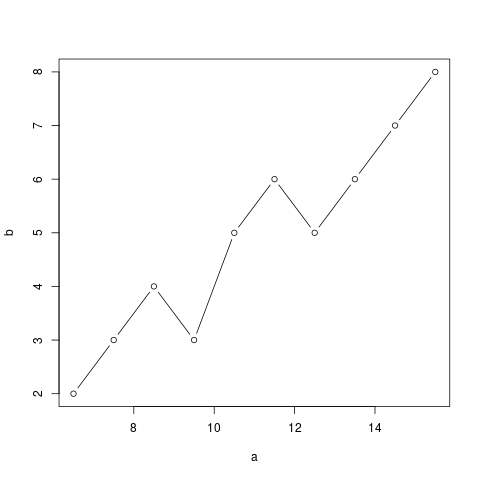

In [12]:
%R plot(a, b, 'b-')

In [13]:
%%R -o lmod
lmod <- lm(b ~ a)
print(lmod)


Call:
lm(formula = b ~ a)

Coefficients:
(Intercept)            a  
       -1.7          0.6  



Interested in the coefficients?

Use R's slot accessor `$` via a call to R in `%R` to retrieve the coefficients as a NumPy array.

In [14]:
coeffs = %R lmod$coefficients
coeffs

array([-1.7,  0.6])

In [15]:
%R print(summary(lmod))


Call:
lm(formula = b ~ a)

Residuals:
   Min     1Q Median     3Q    Max 
 -1.00  -0.35   0.10   0.40   0.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.70000    0.79162  -2.147    0.064 .  
a            0.60000    0.06963   8.617 2.55e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6325 on 8 degrees of freedom
Multiple R-squared:  0.9027,	Adjusted R-squared:  0.8906 
F-statistic: 74.25 on 1 and 8 DF,  p-value: 2.549e-05



Plotting in a 2x2 grid via R's `par` command and setting the output canvas size to 800x600 pixels.

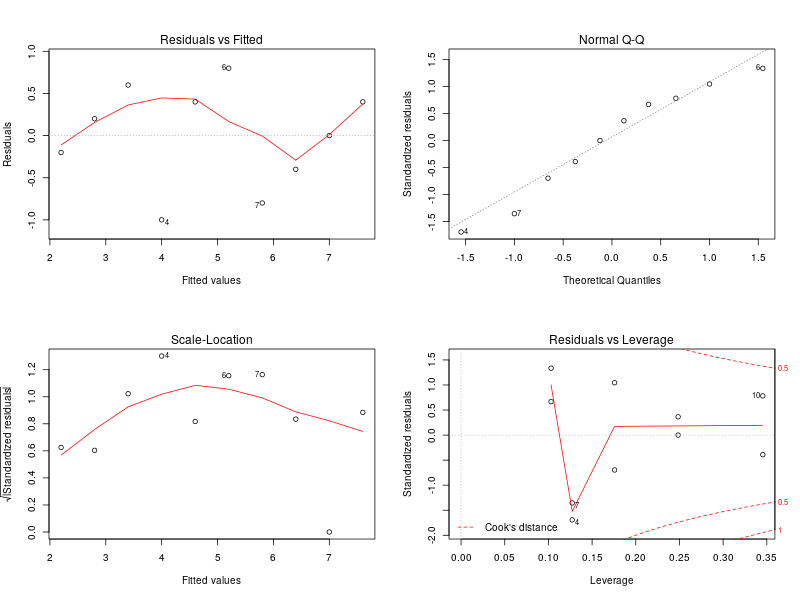

In [16]:
%%R -w 800 -h 600
par(mfrow=c(2,2))
plot(lmod)

In [17]:
%%R -o faithful
library(datasets)
print(summary(faithful))

   eruptions        waiting    
 Min.   :1.600   Min.   :43.0  
 1st Qu.:2.163   1st Qu.:58.0  
 Median :4.000   Median :76.0  
 Mean   :3.488   Mean   :70.9  
 3rd Qu.:4.454   3rd Qu.:82.0  
 Max.   :5.100   Max.   :96.0  


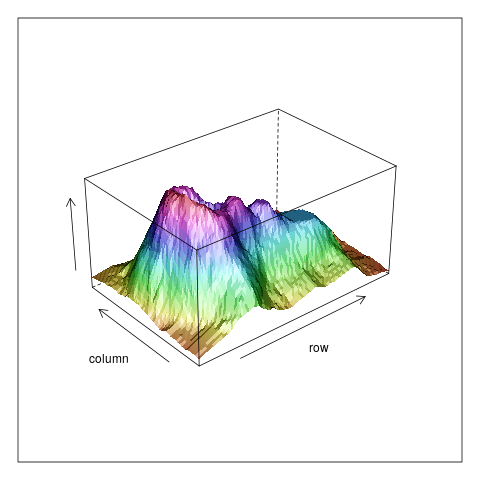

In [18]:
%%R
library(lattice)
print(
    wireframe(volcano,
              shade = TRUE,
              zlab = "",
              aspect = c(61.0/87, 0.5),
              light_source = c(10,0,10)))

### Advanced Example: PCA

In [19]:
%%R -o pca_usarrest
library("stats")
pca_usarrest <- princomp(USArrests, cor=TRUE)
print(summary(pca_usarrest))

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000


In [20]:
%%R
print(summary(pca_usarrest))

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000


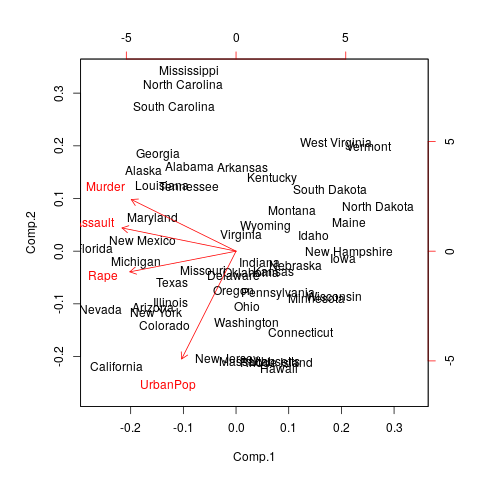

In [21]:
%%R
biplot(pca_usarrest)

The `pca_usarrest` variable references a datastructure from R. Applying R functions via RPy2 directly is no problem.

In [22]:
from rpy2 import robjects as ro
print(ro.r.summary(pca_usarrest))

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000



In [23]:
%R print(help(sum))

R Help on ‘sum’sum                    package:base                    R Documentation

_S_u_m _o_f _V_e_c_t_o_r _E_l_e_m_e_n_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘sum’ returns the sum of all the values present in its arguments.

_U_s_a_g_e:

     sum(..., na.rm = FALSE)
     
_A_r_g_u_m_e_n_t_s:

     ...: numeric or complex or logical vectors.

   na.rm: logical.  Should missing values (including ‘NaN’) be removed?

_D_e_t_a_i_l_s:

     This is a generic function: methods can be defined for it directly
     or via the ‘Summary’ group generic.  For this to work properly,
     the arguments ‘...’ should be unnamed, and dispatch is on the
     first argument.

     If ‘na.rm’ is ‘FALSE’ an ‘NA’ or ‘NaN’ value in any of the
     arguments will cause a value of ‘NA’ or ‘NaN’ to be returned,
     otherwise ‘NA’ and ‘NaN’ values are ignored.

     Logical true values are regarded as one, false values as zero.
     For historical reasons, ‘NUL

array(['/projects/sage/sage/local/lib/R//library/base/help/sum'], 
      dtype='|S54')